#### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Importing the pandas library and aliasing it as pd
import pandas as pd  

import numpy as np 
from scipy import stats
# Importing the seaborn library and aliasing it as sns
import seaborn as sns  

# Importing the pyplot module from the matplotlib library and aliasing it as plt
import matplotlib.pyplot as plt  

# Allowing plots to appear directly in the notebook
%matplotlib inline  

Import the CSV Data as Pandas DataFrame

In [3]:
# Reading a CSV file named 'brain_stroke.csv' into a pandas DataFrame and assigning it to the variable 'df'
df = pd.read_csv('brain_stroke.csv')  

Show Top 5 Records

In [4]:
# Displaying the first few rows of the DataFrame 'df'
df.head()  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Shape of the dataset

In [5]:
# Retrieving the Stroke of the DataFrame 'df'
df.shape  

(4981, 11)

#### 2.2 Dataset Columns
We have 6 numerical features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
                       
                                   
                         
                                  
                       
                 
 
                        
                      
           




#### 3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set


#### 3.1 Check Missing values

In [6]:
# Calculating the sum of missing values (NaN) for each column in the DataFrame 'df'
df.isna().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Prescription,Dosage in mg and  Chronic_Health_Conditions have missing values



#### 3.2 Check Zeros values

In [7]:
# Identifying cells where the value is equal to 0
missing = df.eq(0)  

# Summing up the occurrences of 0 for each column
display(missing.sum())  

gender                  0
age                     0
hypertension         4502
heart_disease        4706
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4733
dtype: int64

#### 3.3 Check Duplicates

In [8]:
# Counting the number of duplicated rows in the DataFrame 'df'
df.duplicated().sum()  

0

There are no duplicates values in the data set

#### 3.4 Check data types

In [9]:
# Displaying concise summary information about the DataFrame 'df'
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


##### 3.5 Checking the numerical and categorical columns

In [10]:
# Identifying numerical features by checking their data types
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Identifying categorical features by checking their data types
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Printing the number and names of numerical features
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))

# Printing the number and names of categorical features
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 6 numerical features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [11]:
# Print unique values for object-type columns
for column in df.columns:  # Iterate over each column in the DataFrame
    if df[column].dtype == 'object':  # Check if the data type of the column is 'object'
        unique_values = df[column].unique()  # Get unique values of the column
        print(f"Unique values for column '{column}': {unique_values}")  # Print the unique values along with column name


Unique values for column 'gender': ['Male' 'Female']
Unique values for column 'ever_married': ['Yes' 'No']
Unique values for column 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children']
Unique values for column 'Residence_type': ['Urban' 'Rural']
Unique values for column 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


##### 3.5 Checking the number of unique values of each column

In [12]:
df.nunique()  # Count distinct observations over requested axis


gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

##### 3.7 Statistical Analysis

In [13]:
# Generating descriptive statistics for numerical columns in the DataFrame 'df'
df.describe()  

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


The dataset includes a diverse age range, with a substantial proportion of middle-aged and older individuals.

Most individuals do not have hypertension, heart disease, or a history of stroke.

There is considerable variation in glucose levels and BMI among the individuals, which could be important factors to consider in further analysis related to stroke risk.

The relatively low mean values for hypertension, heart disease, and stroke indicate that these conditions are less prevalent in the dataset. However, they are crucial variables for understanding stroke risk.


In [14]:
# Generating descriptive statistics for categorical (object) columns in the DataFrame 'df'
df.describe(include='O')  

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


The dataset is predominantly female and mostly consists of individuals who have been married.

The majority of individuals work in the private sector, with other employment types being less common.

There is a nearly even distribution between urban and rural residents, which might be relevant for geographic and lifestyle-related analyses.

A substantial proportion of individuals have never smoked, but smoking behavior varies across the dataset, which could be important in health-related analyses, particularly concerning stroke risk.

#### 4. Exploring Data ( Visualization )

4.1 Imbalance CKD

stroke
0    4733
1     248
Name: count, dtype: int64


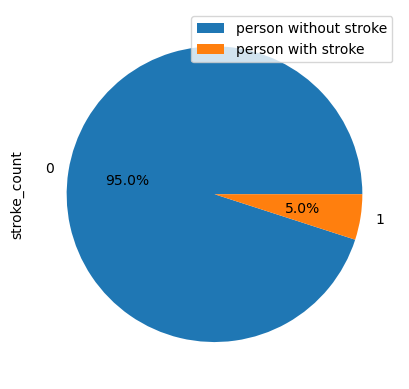

In [15]:
# Displaying the count of each unique value in the 'stroke' column
print(df['stroke'].value_counts())

# Grouping the DataFrame by the 'stroke' column and counting occurrences
stroke = df.groupby(['stroke']).agg(stroke_count=('stroke', 'count'))

# Creating a pie chart based on the 'stroke' column
stroke.plot.pie(y='stroke_count', autopct='%1.1f%%')

# Adding a legend with custom labels
plt.legend(labels=['person without stroke', 'person with stroke'])


# Displaying the plot
plt.show()

Stroke Cases:

There are 248 instances of stroke, which is approximately 5% of the dataset.

Non-Stroke Cases:

There are 4,733 instances without stroke, which is approximately 95% of the dataset.

##### Group age variable

we can group the age into categories such as:

0-18: Children

19-35: Young Adults

36-55: Adults

56-75: Seniors


76 and above: Elderly


In [1]:
# # Define age groups
# bins = [0, 18, 35, 55, 75, float('inf')]
# labels = ['Children', 'Young Adults', 'Adults', 'Seniors', 'Elderly']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [29]:


# Define BMI group categories
age_groups = {
    'Children': (0, 18),
    'Young Adults': (19, 34),
    'Adults': (35, 54),
    'Seniors': (55, 74),
    'Elderly': (75, float('inf'))
}

# Create a function to assign BMI groups
def get_age_group(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age < upper:
            return group

# Apply the function to create a new column for BMI groups
df['age_group'] = df['age'].apply(get_age_group)


In [25]:
# Count the number of individuals in each age group
age_group_counts = df['age_group'].value_counts()

# Print the counts
print(age_group_counts)

age_group
Adults          1349
Seniors         1203
Young Adults     841
Children         823
Elderly          517
Name: count, dtype: int64


##### Group BMI variable

In [28]:

# Define BMI group categories
bmi_groups = {
    'Underweight': (0, 18.5),
    'Normal Weight': (18.5, 24.9),
    'Overweight': (25, 29.9),
    'Obese': (30, float('inf'))
}

# Create a function to assign BMI groups
def get_bmi_group(bmi):
    for group, (lower, upper) in bmi_groups.items():
        if lower <= bmi < upper:
            return group

# Apply the function to create a new column for BMI groups
df['bmi_group'] = df['bmi'].apply(get_bmi_group)



In [27]:
# Count the number of individuals in each age group
age_group_counts = df['bmi_group'].value_counts()

# Print the counts
print(age_group_counts)

bmi_group
Obese            1925
Overweight       1457
Normal Weight    1219
Underweight       320
Name: count, dtype: int64


4.2 Imbalanced Categorical Features

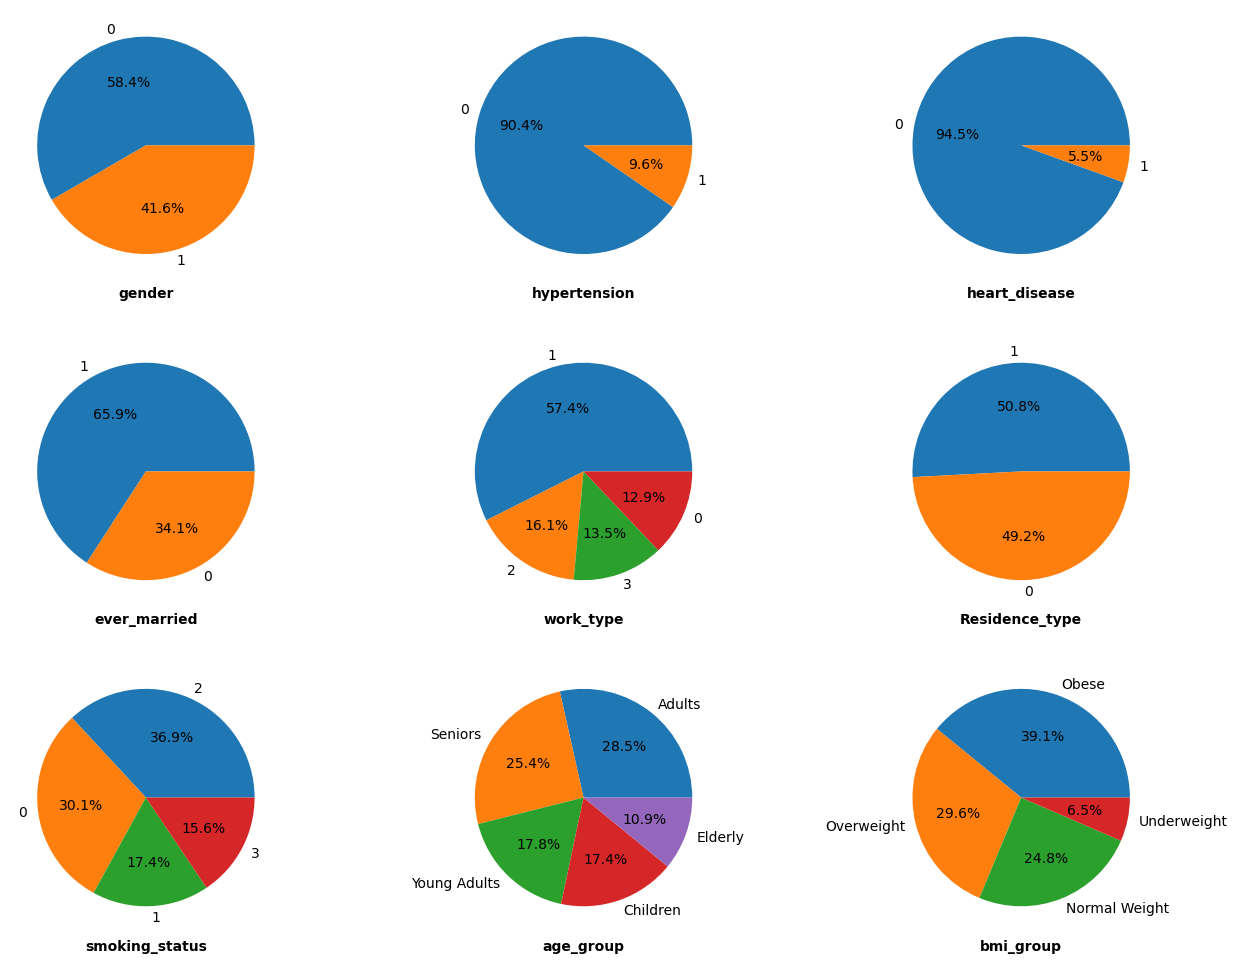

In [27]:
# Create a list containing categorical features
categorical_features =   ['gender', 'hypertension', 'heart_disease', 'ever_married',
                           'work_type', 'Residence_type', 'smoking_status','age_group','bmi_group']

# Set up a figure to contain subplots
plt.figure(figsize=(16, 12))

# Iterate over each categorical feature
for i, col in enumerate(categorical_features):
    # Create subplots in a 3x4 grid
    plt.subplot(3, 3, i+1)
    
    # Plot a pie chart for the distribution of each categorical column
    plt.pie(x=df[col].value_counts().values, 
            labels=df[col].value_counts().index, 
            autopct='%1.1f%%')
    
    # df.iplot(kind='pie',labels=df[col].value_counts().index, 
    #         pull=[0.02, 0.02, 0.1, 0.02])
    
    # Add a bold label for the feature name
    plt.xlabel(col, weight='bold')

# Show the plot
plt.show()


Visual Representation Insights:

These pie charts effectively show the distribution of different categories within each feature.

Most features have a dominant category (e.g., females in gender, no hypertension, no heart disease, married individuals, private work type, urban residence, never smoked, adults in age group, and obese in BMI group).

Understanding the distribution helps in identifying the majority groups and can be useful for further analysis or modeling efforts.

#####  4.5 Categrical Features with stroke

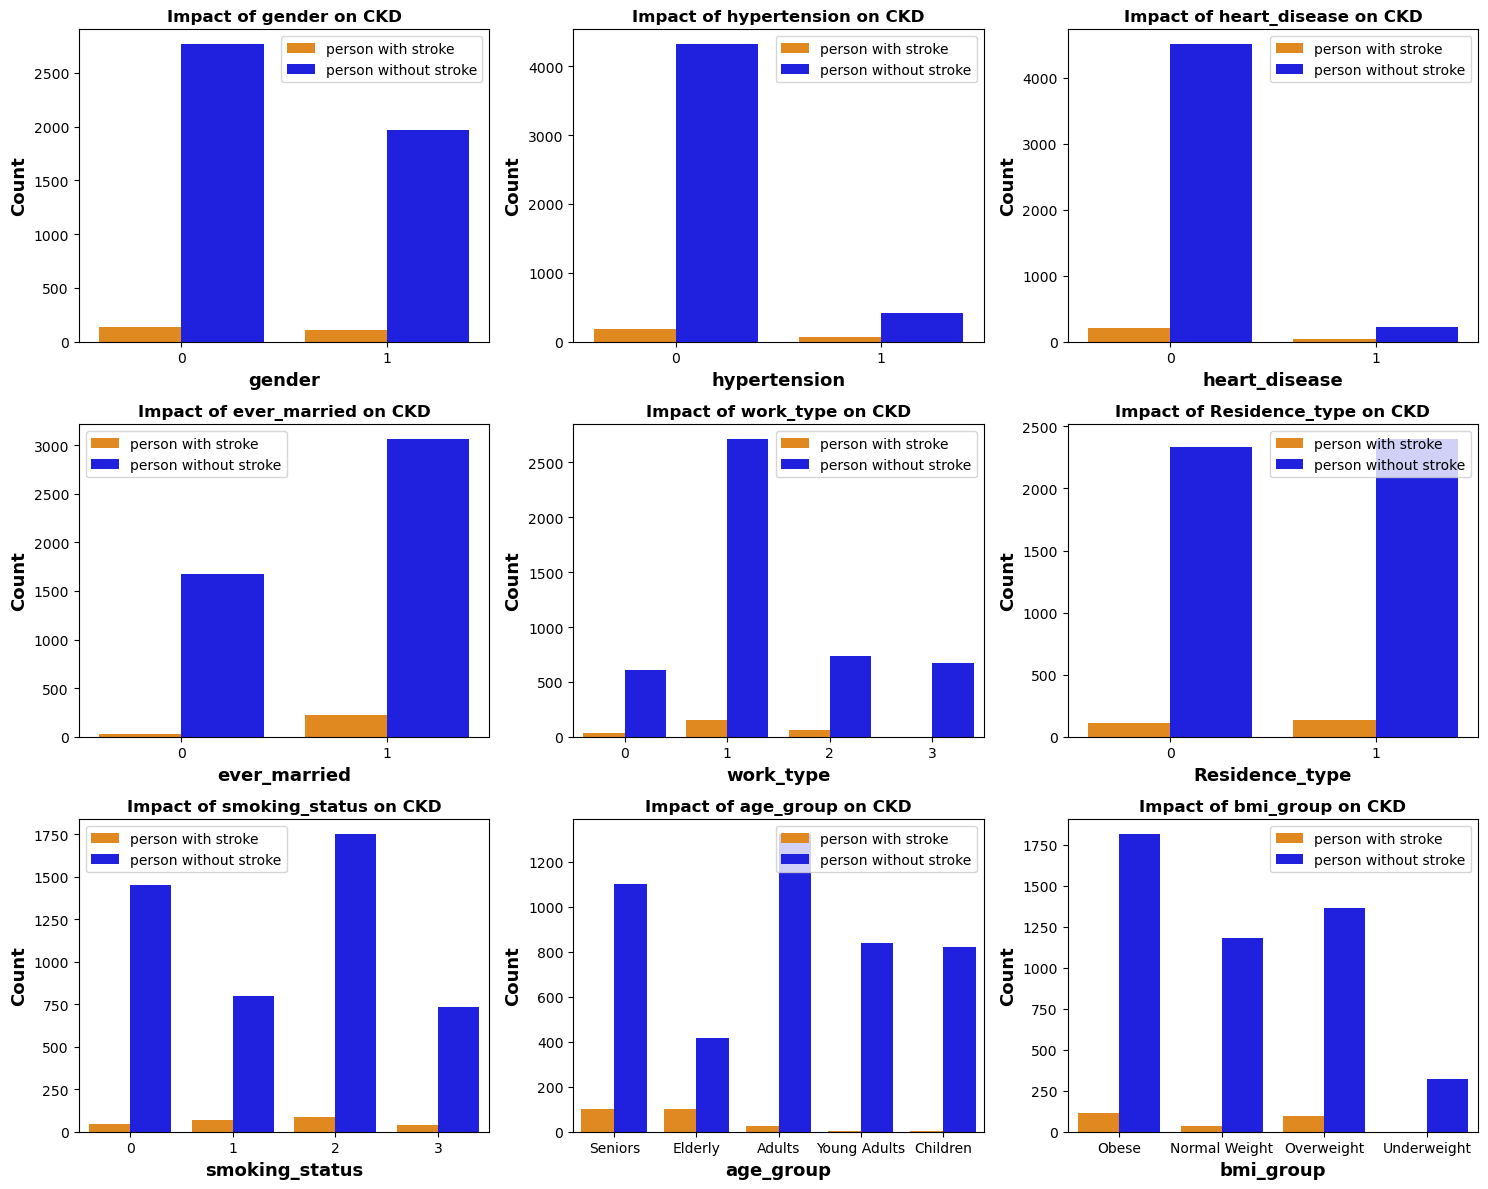

In [28]:

# Convert 'stroke' column to string type
df['stroke'] = df['stroke'].astype(str)
# Create subplots with a 3x4 grid layout
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
# Define the colors for stroke 1 and stroke 0
colors = {'0': 'blue', '1': 'darkorange'}

# Flatten the axes array to iterate over them
axes = axes.flatten()


# Loop through categorical features and plot countplots
for i, col in enumerate(categorical_features):
    # Plot countplots for each categorical feature with 'stroke' as hue
    sns.countplot(data=df, x=col, hue='stroke', ax=axes[i],palette=colors)
    
    # Set title for each subplot
    axes[i].set_title(f'Impact of {col} on CKD', weight='bold')
    
    # Set labels for x and y axes
    axes[i].set_xlabel(col, size=13, weight='bold')
    axes[i].set_ylabel('Count', size=13, weight='bold')
    # Adding a legend with custom labels
    axes[i].legend(labels=['person with stroke', 'person without stroke'])

# Hide empty subplots if there are fewer categorical features than subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()


# Show the plots
plt.show()


Each subplot shows the distribution of stroke occurrence across different categories of a particular feature (like gender, hypertension status, heart disease presence, etc.).

By looking at these plots, one can visually assess if there are any clear patterns or correlations between each categorical feature and the likelihood of having a stroke.


It seems that older people are more prone to brain strokes

There are more percentage of people getting a stroke if they are already suffering from any kind of heart disease.

There are also more percentage of people getting a stroke if they have hypertension.

Strokes are also more likely to happen to people who have high glucose level or are at risk of diabetes, compared to the ones with normal glucose level.

Smoking also increase the risk for brain stroke.

Women are at greater risk for brain stroke than men.¶

Marriage is also responsible for increasing the risk for stroke.

High BMI (more weight) can also increase the chance of getting a stroke.



#### Encoding categorical features

In [29]:
df.drop(columns=['age_group','bmi_group'],inplace=True)
# Convert 'stroke' column to string type
df['stroke'] = df['stroke'].astype(int)


In [30]:
# Convert 'stroke' column to int type
df['stroke'] = df['stroke'].astype(int)
# Convert categorical columns to numerical (Label Encoding for simplicity here)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' :
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le



##### 4.3 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

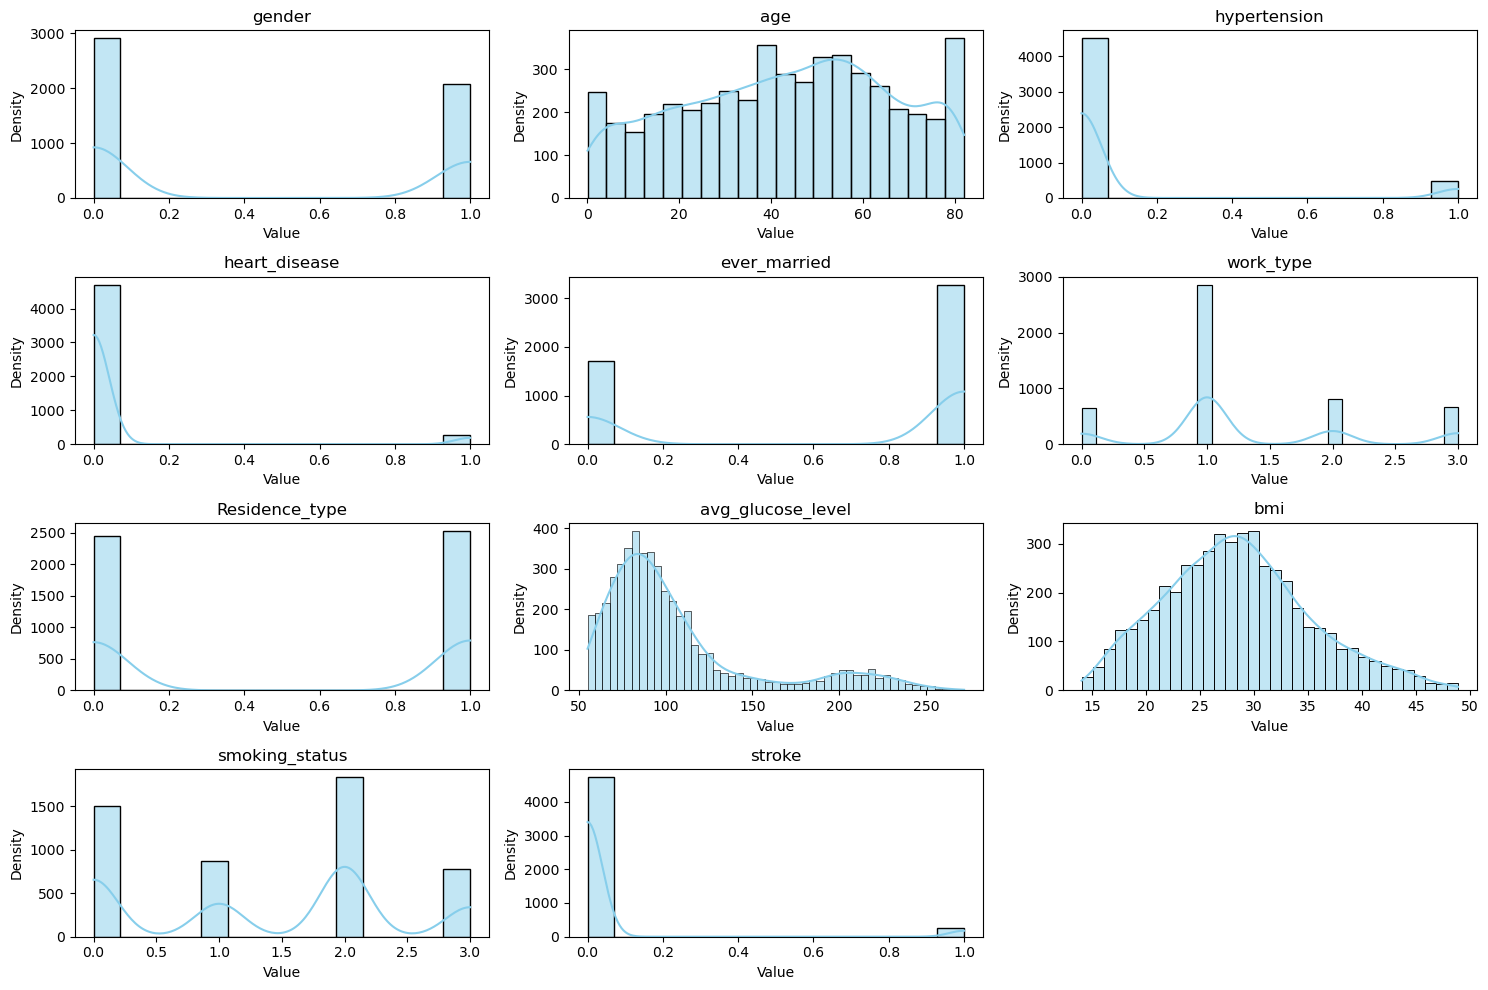

In [31]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# Calculate the number of plots based on the number of numerical columns
num_plots = len(numerical_columns)

# Define the number of rows and columns for the grid layout
num_rows = 4 
num_cols = 3

# Create a figure and a set of subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each numerical column and create a histogram with KDE on its corresponding subplot
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax, color='skyblue', edgecolor='black')  # Add KDE to the histogram
    ax.set_xlabel('Value')  # Set x-axis label
    ax.set_ylabel('Density')  # Set y-axis label
    ax.set_title(f'{column}')  # Set title for the subplot

# Hide empty subplots beyond the number of plots
for i in range(num_plots, num_rows*num_cols):
    axes[i].axis('off')  # Turn off axis for empty subplots

# Adjust the layout of subplots to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### 4.4 Numerical Features with stroke

In [32]:
# Displaying the count of each unique value in the 'stroke' column
print(df['stroke'].value_counts())

stroke
0    4733
1     248
Name: count, dtype: int64


c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

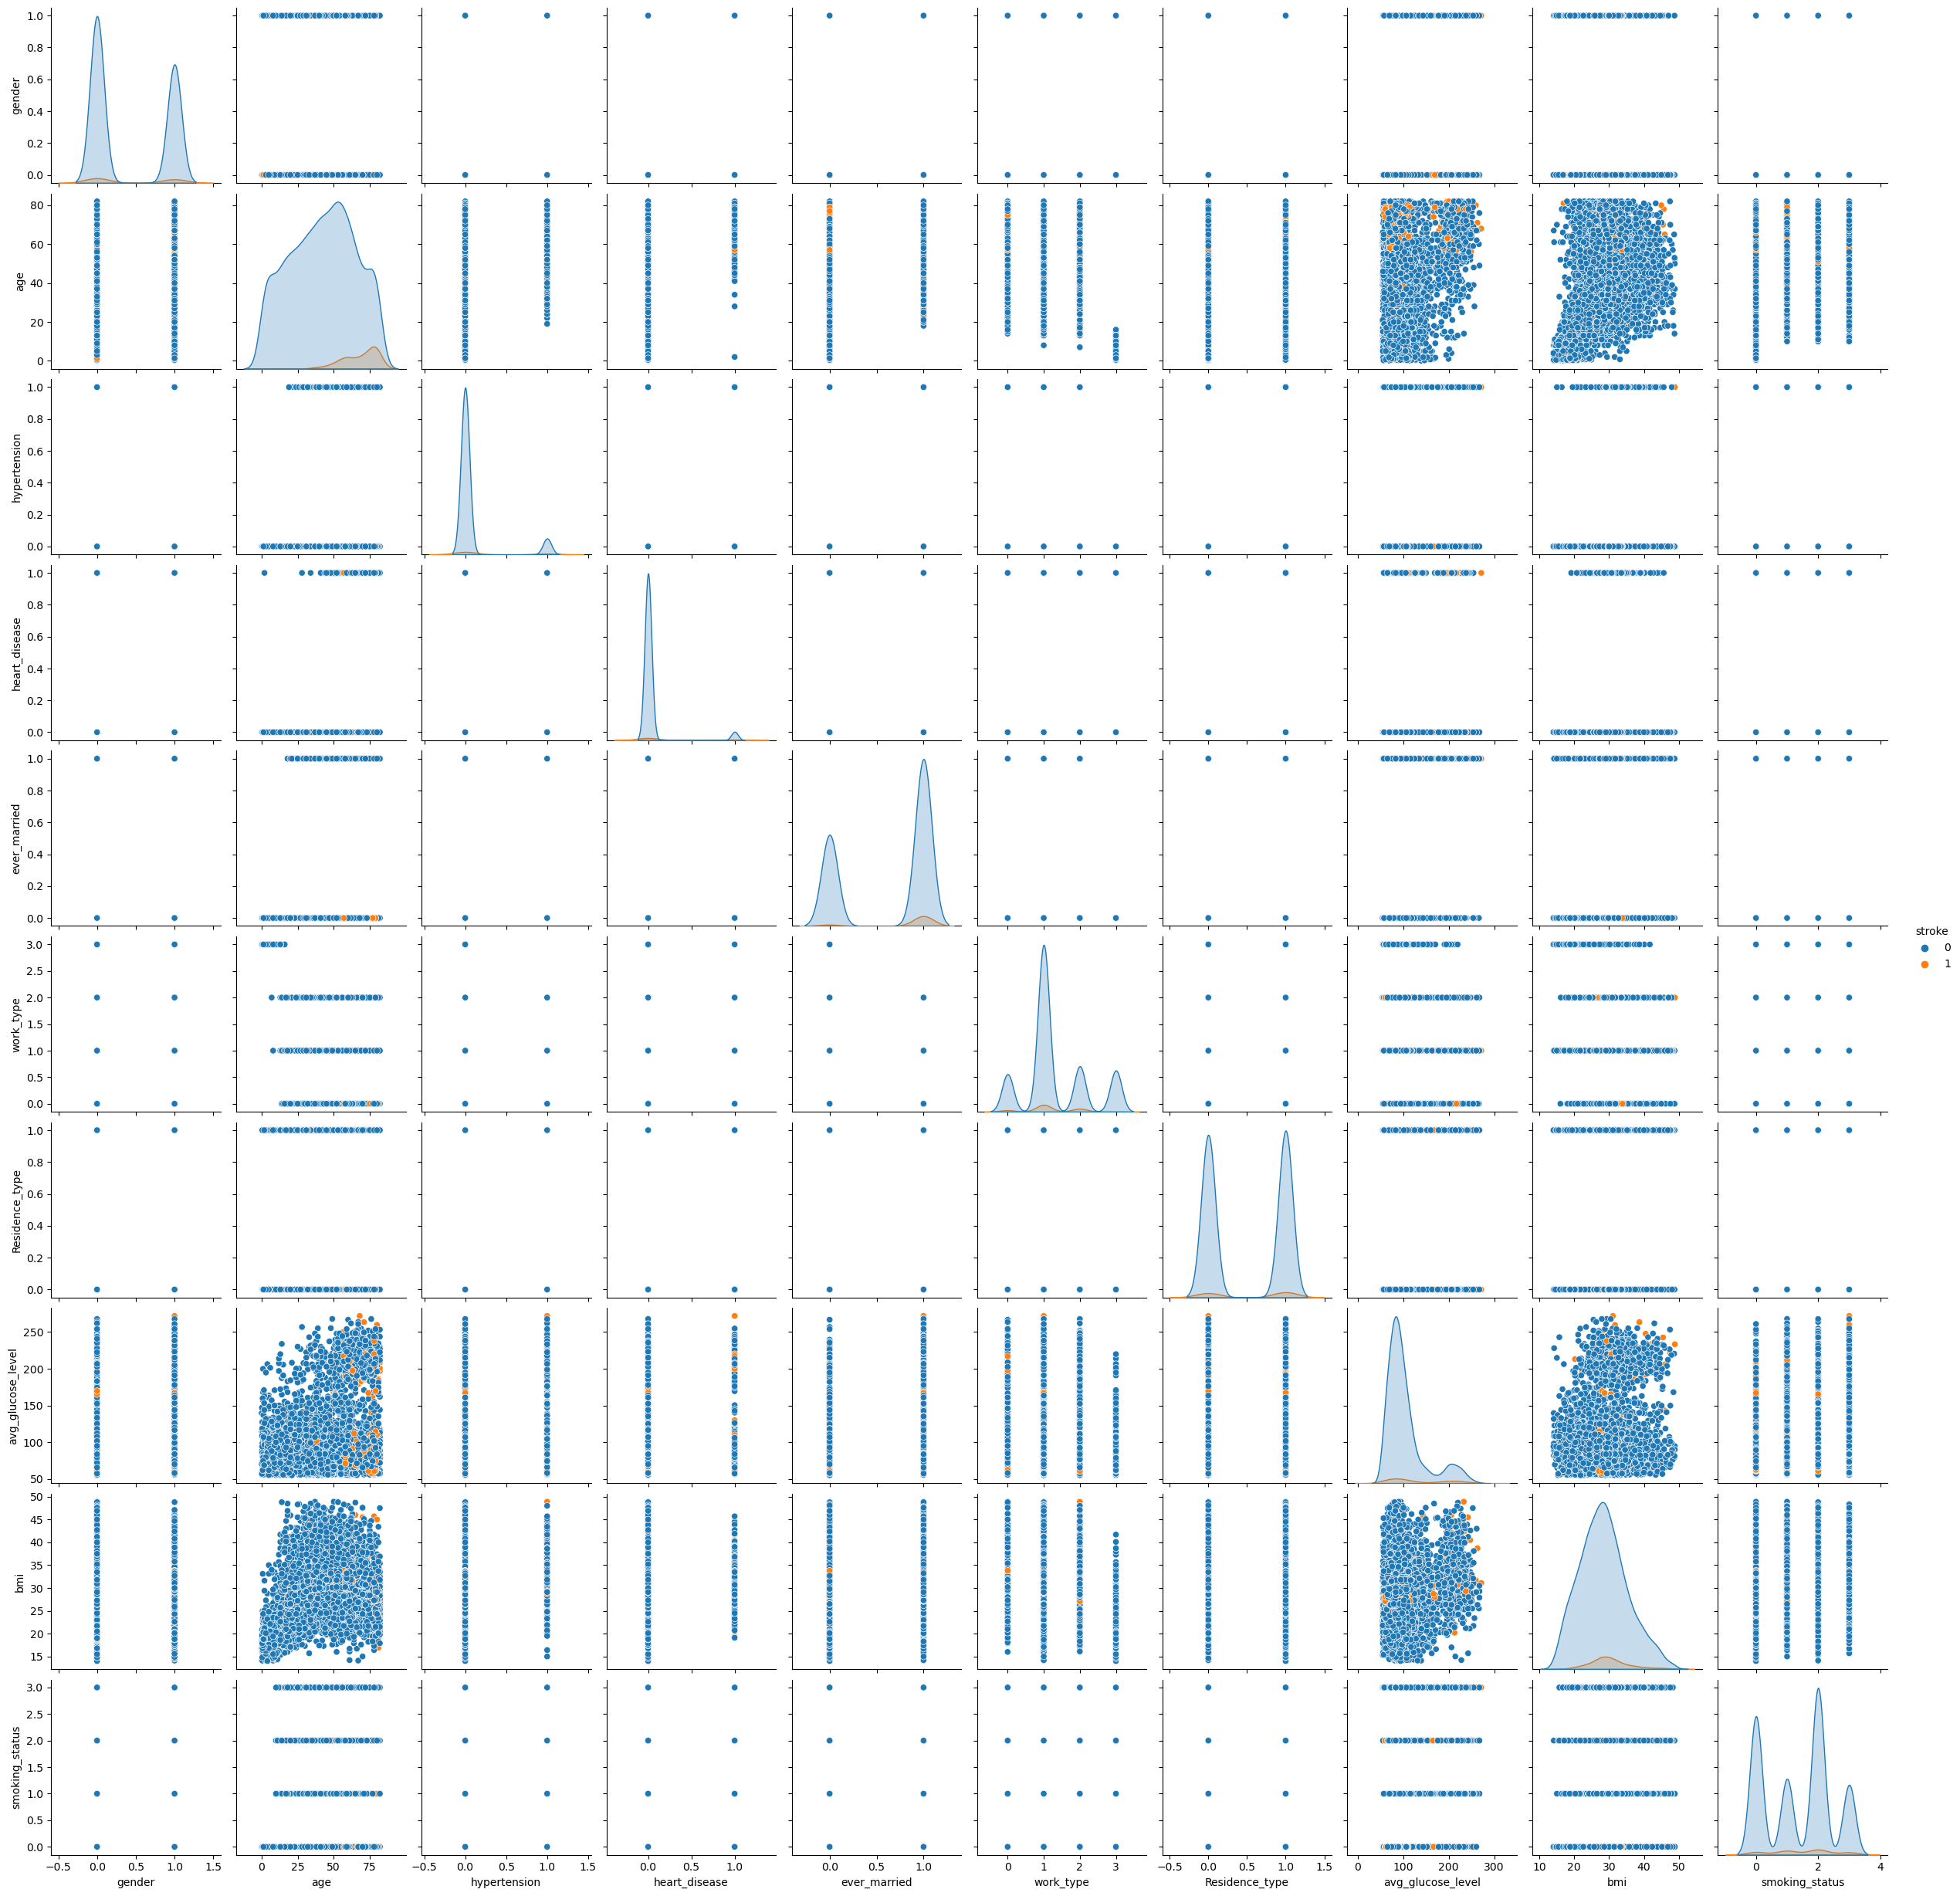

In [33]:
# Generating a pair plot to visualize relationships between pairs of variables
sns.pairplot(data=df, hue='stroke')

# Displaying the plot
plt.show()

Insights from the Pair Plot
A pair plot provides a comprehensive view of the relationships between pairs of variables. Here are some insights you can derive from it:

Relationships Between Variables:

Scatter Plots: Each scatter plot in the pair plot matrix shows the relationship between two variables. You can observe the correlation between variables and how they relate to the occurrence of strokes. For example, a noticeable separation between the two hues (stroke vs. no stroke) in a scatter plot indicates that the variables might be good predictors of stroke.

Diagonal Plots: The diagonal of the pair plot matrix typically shows the distribution of each variable (e.g., histograms or KDE plots).
Patterns and Clusters:

Look for patterns or clusters in the scatter plots. If points with the same hue form distinct clusters, it suggests that certain combinations of variables are associated with a higher likelihood of stroke.
Example: If a scatter plot of age vs. avg_glucose_level shows that individuals with high glucose levels and older age are mostly in the "Has stroke" category, it indicates a potential risk factor.
Correlation:

Positive Correlation: A scatter plot showing an upward trend indicates a positive correlation between the two variables.
Negative Correlation: A downward trend indicates a negative correlation.
No Correlation: A scatter plot without any noticeable trend indicates no significant correlation.
Separability:

Good Separability: If the points with strokes and those without are well-separated in some scatter plots, it suggests that these variables can effectively distinguish between individuals with and without strokes.
Poor Separability: Overlapping points indicate that the variables do not differentiate well between the two groups.
Example Interpretation


#### 4.6 Relationship between features

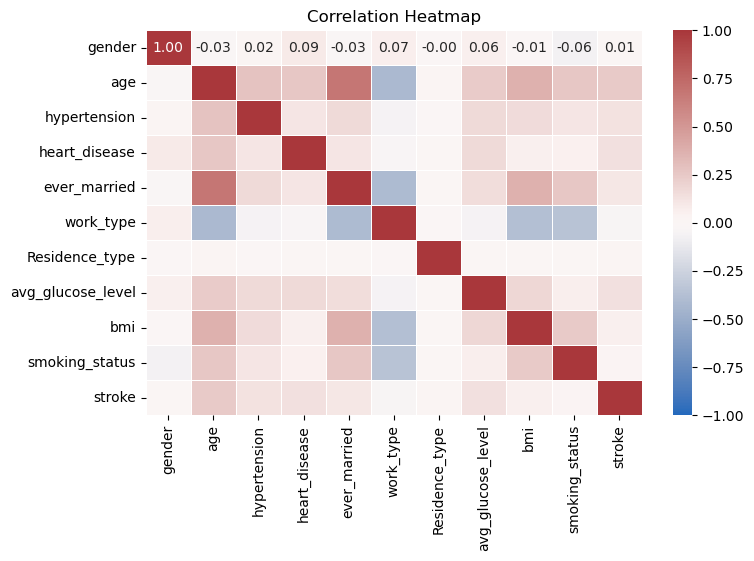

In [34]:
# correlation matrix
plt.figure(figsize=(8, 5), facecolor="white")  # Create a figure with specified size and background color

# plotting
sns.heatmap(
    data=df.corr(),  # Compute pairwise correlation of columns with numeric data types
    cmap="vlag",  # Color map for the heatmap
    vmin=-1, vmax=1,  # Set the range of values for colormap normalization
    linecolor="white", linewidth=0.5,  # Set line color and width between cells
    annot=True,  # Annotate each cell with the numeric value
    fmt=".2f"  # Format of the annotations
)

plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Display the plot



Insights from the Correlation Matrix
A correlation matrix shows the pairwise correlation coefficients between numerical variables, providing insights into the strength and direction of relationships. Here are the potential insights:

Understanding Correlation Values:

Positive Correlation: Values closer to 1 indicate a strong positive correlation. As one variable increases, the other also increases.

Negative Correlation: Values closer to -1 indicate a strong negative correlation. As one variable increases, the other decreases.

No Correlation: Values around 0 indicate no significant correlation between the variables.


##### 4.7 CHECKING OUTLIERS

In [35]:
# Create list of features_to_scale_robust
features_to_scale_robust = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                             'Residence_type', 'avg_glucose_level',
                             'smoking_status']

# Function to count outliers and remove them from the dataframe
def count_outliers(feature_name, df):
    feature = df[feature_name]
    Q1 = feature.quantile(0.25)  # Calculate the first quartile
    Q3 = feature.quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
    outliers = (feature < lower_bound) | (feature > upper_bound)  # Identify outliers
    num_outliers = outliers.sum()  # Count the number of outliers
    df_without_outlier = df.loc[~outliers]  # Create a new DataFrame without outliers
    return num_outliers, df_without_outlier  # Return the number of outliers and the cleaned DataFrame

df_cleaned = df.copy()  # Create a copy of the original dataframe
total_outliers_deleted = 0  # Initialize variable to store the total number of deleted outliers

# Iterate through each feature
for feature in features_to_scale_robust:
    # Call count_outliers function to count outliers and get cleaned dataframe
    num_outliers, df_cleaned = count_outliers(feature, df_cleaned)
    print(f'Number of outliers in {feature}: {num_outliers}')  # Print the number of outliers for each feature
    total_outliers_deleted += num_outliers  # Add the number of outliers deleted for each feature

print(f'Total number of outliers deleted: {total_outliers_deleted}')  # Print the total number of outliers deleted


Number of outliers in gender: 0
Number of outliers in age: 0
Number of outliers in hypertension: 479
Number of outliers in heart_disease: 211
Number of outliers in ever_married: 0
Number of outliers in work_type: 0
Number of outliers in Residence_type: 0
Number of outliers in avg_glucose_level: 401
Number of outliers in smoking_status: 0
Total number of outliers deleted: 1091


Insights from the Outlier Removal Process

Understanding the Distribution of Features:

The IQR method helps identify the spread and distribution of each feature.

Features with a high number of outliers may have a wider range or be skewed.

Impact on Data Quality:

Removing outliers can improve the quality of the dataset by reducing noise and making patterns more apparent.
It helps in stabilizing statistical measures like mean and variance, which can be sensitive to extreme values.
Feature-Specific Observations:

hypertension, heart_disease, and avg_glucose_level have  A high number of outliers.


In [36]:
#Check the amount of satisfied in df before dropping outliers
print ('The amount of Has stroke in df before dropping outliers: ', len(df[df['stroke'] == 1]))
#Check the amount of satisfied in df after dropping outliers
print ('The amount of Has stroke in df after dropping outliers: ', len(df_cleaned[df_cleaned['stroke'] == 1]))
#Check the amount of neutral or dissatisfied in df before dropping outliers
print ('The amount of No stroke in df before dropping outliers: ', len(df[df['stroke'] == 0]))
#Check the amount of neutral or dissatisfied in df after dropping outliers
print ('The amount of  No stroke in df after dropping outliers: ', len(df_cleaned[df_cleaned['stroke'] == 0]))


The amount of Has stroke in df before dropping outliers:  248
The amount of Has stroke in df after dropping outliers:  110
The amount of No stroke in df before dropping outliers:  4733
The amount of  No stroke in df after dropping outliers:  3780


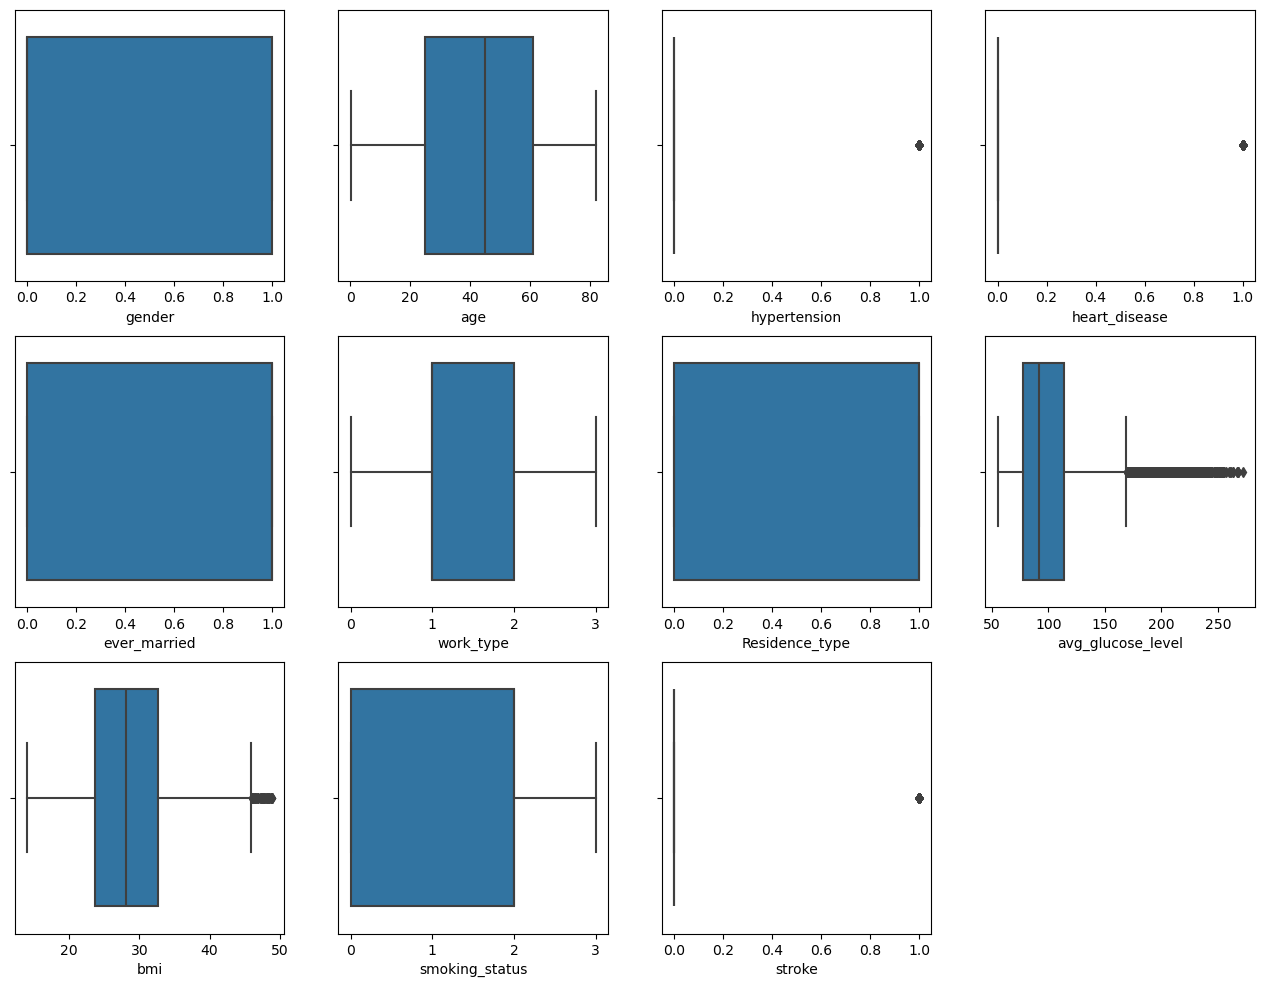

In [37]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(16, 12))  # Set the figure size

# Iterate through each column in the DataFrame
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)  # Create subplots in a 3x3 grid
    sns.boxplot(x=col, data=df)  # Plot boxplot for the current column
plt.show()  #

#### 4.8 Check Highly correlated features with Storke

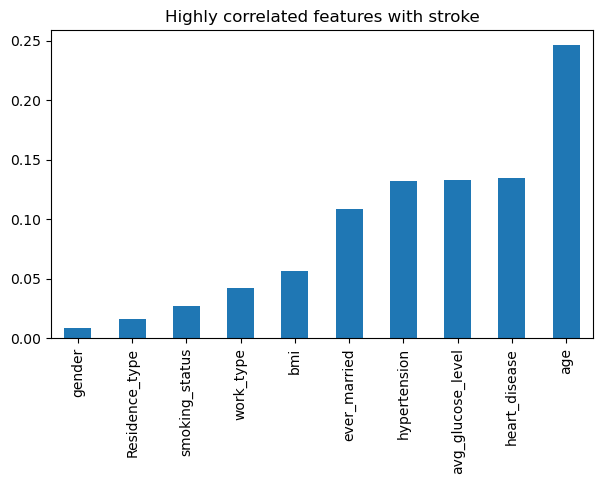

In [38]:
plt.figure(figsize=(7, 4))  # Set the figure size

# Calculate the absolute correlation of each feature with the 'Storke' column, excluding the last column (which is 'Storke' itself)
correlation_series = df.corr()['stroke'][:-1].abs().sort_values()

# Plot a bar chart of highly correlated features with 'Storke'
d = correlation_series.plot(kind='bar', title='Highly correlated features with stroke')

plt.show()  # Show the bar chart

In [39]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


Save cleaned data to csv file

In [40]:
df.to_csv('cleaned_data.csv', index=False) 